#Descripcion:

---
En el mundo hay 4 formas de medir la temperatura:


1.  Escala Fahrenheit (EEUU): el agua se congela a 32° y hierve a las 212°
2.  Escala Celsius (No EEUU): el agua se congela a 0° y hierve a las 100°
3.  Escala De Kelvin (cientifico): el agua se congela a 273.15 k y hierve a las 373.15 k
4. Escala De Rankine (obsoleto):  el agua se congela a 0° y hierve a las 671.67°



---



*   Crearemos un software con programación regular para conversión de grados (celsius a fahrenheit).
*   Crearemos una IA que permita convertir grados Celsius a Fharenheit (sin reglas ni logíca)



#Conversión con Programación clasica/regular

Donde el programador:
*  Crea las reglas 
*  Crea la logica de como se aplican esas reglas.

Ejemplo: software para convertir grados Celsius a Fahrenheit:

Fah = Celsius * 1.8 + 32



In [16]:
#creamos una funcion para convertir
def f_conv_cels_fah (p_celsius):
  fah= p_celsius*1.8 + 32
  return fah

def f_conv_fah_cels(p_fahrenheit):
  cels = ((p_fahrenheit-32)*5)/9
  return cels

print('50° Celsius= ',
      f_conv_cels_fah(50),
      '° Fahrenheit ')
print('50° Fahrenheit= ',
      f_conv_fah_cels(50),
      '° Celsius ')

50° Celsius=  122.0 ° Fahrenheit 
50° Fahrenheit=  10.0 ° Celsius 


*  pero y si no conocemos las reglas?
*  y si no es la logica es muy compleja o peor es muy variable?


#Conversión con IA 

*   Una red con una capa de entrada y una de salida
*   para que entrene le pasamos los grados celsius y su conversión fahrenheit 
*   La red neuronal aprendera por si sola las reglas y la logíca con todas sus variaciones (pesos y sesgos).
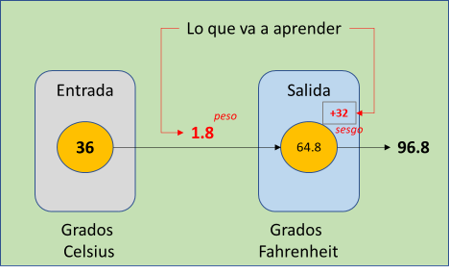

##P1. importando librerias.

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

##P2. definiendo los parametros de entrada y salida (capas)
---
tomaremos 10 datos (muuuuuuuuuuy pocos...pero sirve pa la explicación)


In [ ]:
celsius    = np.array([-100, -55, -40, -23 , -10,  0,  8, 15, 22,  38], dtype=float)   #parametros de entrada
fahrenheit = np.array([-148, -67, -40, -9.4, 14, 32, 46, 59, 72, 100], dtype=float) #parametros de salida 

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/2HenryCardenas1/DeepLearning/main/Datasets/Data_Celsius-Fahrenheit.csv")
df.head()

,celsius,fahrenheit
0,368.88210,695.98778
1,58.81090,137.85962
2,239.92880,463.87184
3,55.81605,132.46889
4,427.28610,801.11498


In [4]:
df.shape

(999, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   celsius     999 non-null    float64
 1   fahrenheit  999 non-null    float64
dtypes: float64(2)
memory usage: 15.7 KB


Notas (errores en la data):


*   Muuuuuuuuuuuuuuuuuuuuuuy poquitos datos
*   ni un solo datos flotante....
*   rango muy pequeño de datos



##P3. creando la red neuronal

---



*   Usamos Keras como libreria de alto nivel (facilita mucho la creación de redes neuronales)
*   usaremos un modelo secuencial (una red simple), hay más modelos, ejemplo: CNN, LSTM/ RNN, GAN, BERT
*   crearemos 3 capas densas, que son aquellas que tiene conexiones con todas las neuronas de la siguiente capa, donde:
    *   Units= cantidad de neuronas
    *   input_shape= cantidad de nueronas de entrada   
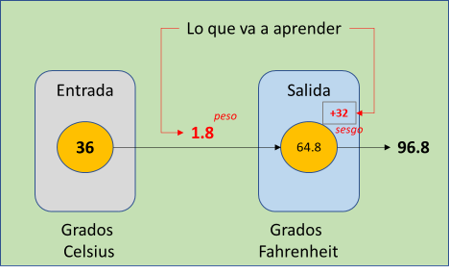 

In [8]:
capa = tf.keras.layers.Dense(units=1, input_shape=[1])
modelo = tf.keras.Sequential([capa])

###P3.1 compilamos la red:


*   Usaremos el optimizador ADAM, hay otros más complejos como RELU, SOFTMAX...etc...es quien le dice a la red como ajustar los pesos y los sesgos (le dice como aprender y no desaprender)
*  definiremos una tasa de aprendizaje de 0.1 (entre más pequeño el número el ajuste es menor y más tiempo dura en aprender).
*   tomaremos la una función de calculo de perdida del aprendizaje llamada "MEAN_SQUARED_ERROR- error cuadradico medio", que es "una poca cantidad de error grandes es PEOR que una gran cantidad de errores pequeños" 



In [9]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

##P4.entrenando

In [ ]:
print("Comenzando entrenamiento...")
historial = modelo.fit(df['celsius'], df['fahrenheit'], epochs=1000, verbose=True)
print("Modelo entrenado!")

###P4.1 resultados del entrenamiento

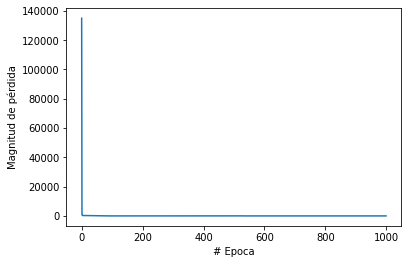

In [11]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

##P5. hagamos una predicción

In [17]:
v_celsius= 40
print("Hagamos una predicción!")
resul_IA   = modelo.predict([v_celsius])
result_real= f_conv_cels_fah(v_celsius)
dif        = 100-(resul_IA*100/result_real)
print('Celsius= ',v_celsius, '° = Fahrenheit:',
      '\nIA: ',resul_IA,
      '\nRegular: ',result_real,
      '\nDif %:',dif)

Hagamos una predicción!
Celsius=  40 ° = Fahrenheit: 
IA:  [[103.99985]] 
Regular:  104.0 
Dif %: [[0.00015259]]


Prediccion de grados fahrenheit


In [18]:
v_fahrenheit= 40
print("Hagamos una predicción!")
resul_IA   = modelo.predict([v_fahrenheit])
result_real= f_conv_fah_cels(v_fahrenheit)
dif        = 100-(resul_IA*100/result_real)
print('Celsius= ',v_fahrenheit, '° = Fahrenheit:',
      '\nIA: ',resul_IA,
      '\nRegular: ',result_real,
      '\nDif %:',dif)

Hagamos una predicción!
Celsius=  40 ° = Fahrenheit: 
IA:  [[103.99985]] 
Regular:  4.444444444444445 
Dif %: [[-2239.9963]]


##P6. conociendo que sesgos y pesos resultantes


---
Una vez termina de entrenar las neuronas quedan con pesos y sesgos 




In [19]:
print("Variables internas del modelo")
print('peso: ',capa.get_weights()[0])
print('sesgo: ',capa.get_weights()[1])

Variables internas del modelo
peso:  [[1.7999965]]
sesgo:  [31.99998]


la red sin decirle las reglas ni la logica pudo ella sola generar un algorimo para calcular un valor aproximado del 99% de acertabilidad.

fahr= cels *1.8 + 32

y= mx + b  (regresión lineal)

##P7. y si le pongo más neuronas y más capas?

###P7.1 creamos un modelo con dos capas ocultas

In [20]:
oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])  # capa DENSA con 3 neuronas y el entra información de 1 capa
oculta2 = tf.keras.layers.Dense(units=3)                   # capa DENSA con 3 neuronas
salida  = tf.keras.layers.Dense(units=1)                    # capa de salida con 1 neurona
#creamos el modelo con las 4 capas (recuerden 1 que la de la parametros no hace falta definirla)
modelo_v2 = tf.keras.Sequential([oculta1, oculta2, salida])

In [21]:
# compilamos
modelo_v2.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

In [ ]:
#entrenamos
print("Comenzando entrenamiento...")
historial_V2 = modelo.fit(df['celsius'], df['fahrenheit'], epochs=1000, verbose=True)
print("Modelo_v2  entrenado!")

###P7.2 resultados del entrenamiento

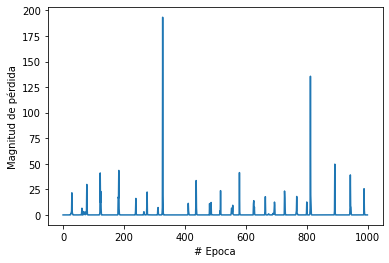

In [25]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial_V2.history["loss"])

###P7.3. conociendo que sesgos y pesos resultantes


---
Una vez termina de entrenar las neuronas quedan con pesos y sesgos 


In [26]:
print("Variables internas del modelo")
print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())

Variables internas del modelo
[array([[-0.8896414, -0.5007956,  0.7658706]], dtype=float32), array([0., 0., 0.], dtype=float32)]
[array([[-0.11626983, -0.20430255,  0.2852025 ],
       [-0.53329563,  0.474334  ,  0.08844948],
       [-0.7340598 , -0.8272333 , -0.7372327 ]], dtype=float32), array([0., 0., 0.], dtype=float32)]
[array([[ 0.5998074 ],
       [-0.04723108],
       [-0.02667987]], dtype=float32), array([0.], dtype=float32)]


###P7.4. hagamos una predicción

In [27]:
v_celsius= 50
print("Hagamos una predicción!")
resul_IA   = modelo_v2.predict([v_celsius])
result_real= f_conv_cels_fah(v_celsius)
dif        = 100-(resul_IA*100/result_real)
print('Celsius= ',v_celsius, '° = Fahrenheit:',
      '\nIA: ',resul_IA,
      '\nRegular: ',result_real,
      '\nDif %:',dif)

Hagamos una predicción!
Celsius=  50 ° = Fahrenheit: 
IA:  [[-2.969997]] 
Regular:  122.0 
Dif %: [[102.434425]]


In [28]:
v_fahrenheit= 40
print("Hagamos una predicción!")
resul_IA   = modelo_v2.predict([v_fahrenheit])
result_real= f_conv_fah_cels(v_fahrenheit)
dif        = 100-(resul_IA*100/result_real)
print('Celsius= ',v_fahrenheit, '° = Fahrenheit:',
      '\nIA: ',resul_IA,
      '\nRegular: ',result_real,
      '\nDif %:',dif)

Hagamos una predicción!
Celsius=  40 ° = Fahrenheit: 
IA:  [[-2.3759968]] 
Regular:  4.444444444444445 
Dif %: [[153.45993]]


#CONCLUSIONES:


---

El uso de redes neuronales es aplicable en casí cualquier problema que requiera clasificación o predicción  

Al usar capas ocultas:
2.  El aprendizaje se realiza en menor cantida de EPOCS/CICLOS y configurando algunos Hyper-parametros el modelo se vuelve más eficiente
3.   La signación de pesos y sesgos se vuelve más complejo de analizar
4.   La cantidad de capas y neuronas NO se hace de forma aleatoria, se hace usando una formula de compensación (la veremos despues).




# Que sigue ahora:

---


1.   Crear Redes neuronales para PLN (procesamiento de lenguaje natural)
2.   Crear redes neuronales para visión artificial
3.   Crear redes neuronales Transformer (BERT) 
4.   Crear redes nueronales geneticas  (--INVESTIGACIÓN--)
5.   Crear redes neuronales de colmena (--INVESTIGACIÓN--)
6.   Crear redes neuronales cognitivas (--INVESTIGACIÓN--)



